The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

In [164]:
df=pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [166]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [167]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [168]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

above we see class columns having not balanced data distribution
This Dataset is highly unblanced

0 --> Normal Transaction

1 --> fraudulent transaction

In [169]:
legit=df[df["Class"]==0]
fraud=df[df["Class"]==1]

In [170]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [171]:
legit.value_counts().sum()

284315

In [172]:
fraud.value_counts().sum()

492

In [173]:
#statistical infomation about class with respect to amount
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [174]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [175]:
legit_sample=legit.sample(n=492)

In [176]:
legit_sample.Amount.describe()

count     492.000000
mean       81.803171
std       281.646188
min         0.000000
25%         4.957500
50%        19.995000
75%        64.162500
max      4959.850000
Name: Amount, dtype: float64

In above output we see there is not much more difference in output of legit_sample and legit

In [177]:
#now concating the fraud and legit_sample together rowise

In [178]:
df_new=pd.concat([legit_sample,fraud], axis=0)

In [179]:
df_new.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
51948,45204.0,-0.742751,0.475642,1.266253,0.514362,-0.310715,1.112718,1.079678,0.026520,0.349170,...,-0.042117,0.150953,-0.327419,-0.975982,0.344032,-0.246064,0.108742,0.060568,199.48,0
72090,54560.0,1.086081,-1.076948,0.735946,-0.785195,-1.146546,0.315644,-1.000523,0.164404,-0.780097,...,0.519778,1.230595,-0.238844,-0.223227,0.353696,-0.032414,0.033141,0.031218,129.00,0
187130,127399.0,1.910441,-0.751755,-0.554896,0.148276,-0.705147,-0.123455,-0.740698,0.123589,1.725341,...,0.183542,0.577415,0.138205,0.608761,-0.215041,0.101776,-0.004125,-0.031410,55.95,0
35402,38105.0,-1.433971,1.372233,0.588119,-0.603508,1.311183,0.268878,1.288159,-0.558558,0.912962,...,-0.678604,-0.722921,-0.042497,-1.359033,0.245995,0.131132,0.288149,-0.121671,17.99,0
134114,80652.0,1.154212,0.221124,0.541786,1.316365,-0.220439,-0.207687,0.006521,0.002216,0.213915,...,-0.178124,-0.371896,0.045090,0.065460,0.453145,-0.468937,0.043770,0.023639,11.99,0


In [180]:
df_new.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [181]:
df_new["Class"].value_counts() 

0    492
1    492
Name: Class, dtype: int64

<Axes: xlabel='Class', ylabel='Count'>

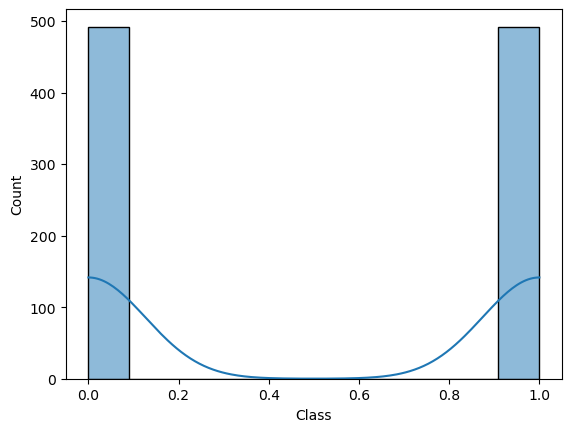

In [182]:
#visualization of class distribution of df_new
sns.histplot(df_new["Class"],kde=True)

In [183]:
df_new.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
51948,45204.0,-0.742751,0.475642,1.266253,0.514362,-0.310715,1.112718,1.079678,0.026520,0.349170,...,-0.042117,0.150953,-0.327419,-0.975982,0.344032,-0.246064,0.108742,0.060568,199.48,0
72090,54560.0,1.086081,-1.076948,0.735946,-0.785195,-1.146546,0.315644,-1.000523,0.164404,-0.780097,...,0.519778,1.230595,-0.238844,-0.223227,0.353696,-0.032414,0.033141,0.031218,129.00,0


In [184]:
x=df_new.drop(["Time","Class"],axis=1)
y=df_new["Class"]

In [185]:
y.value_counts()

0    492
1    492
Name: Class, dtype: int64

In [186]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [187]:
#logistic regression modeling

lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [188]:
y_train_pred=lr.predict(x_train)

Evalution of model

In [189]:
from sklearn.metrics import accuracy_score

In [190]:
accuracy_score_train= accuracy_score(y_train,y_train_pred)
accuracy_score_train

0.9552845528455285

In [191]:
y_test_pred=lr.predict(x_test)

In [193]:
accuracy_score_test=accuracy_score(y_test,y_test_pred)
accuracy_score_test

0.9105691056910569

Cross val checking

In [196]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(lr,x,y,cv=200)

In [276]:
cv_1=np.mean(cvs)
cv_1

0.93125

0.93125

In [202]:
from sklearn.naive_bayes import GaussianNB
gn=GaussianNB()
gn.fit(x_train,y_train)

GaussianNB()

Evalution of model

In [211]:
y_train_pred=gn.predict(x_train)

In [212]:
train_accuracy_score=accuracy_score(y_train,y_train_pred)
train_accuracy_score

0.9254742547425474

In [213]:
y_test_pred=gn.predict(x_test)

In [214]:
test_accuracy_score=accuracy_score(y_test,y_test_pred)
test_accuracy_score

0.8861788617886179

In [215]:
#checking cross value score 
cv1=cross_val_score(gn,x,y,cv=100)

In [275]:
cv_2=np.mean(cv1)
cv_2

0.9007777777777777

In [219]:
#checking accuracy by confusion matrix

from sklearn.metrics import confusion_matrix
cnn=confusion_matrix(y_test,y_test_pred)
cnn

array([[119,   7],
       [ 21,  99]], dtype=int64)

In [220]:
199+99

298

In [221]:
298+28

326

In [222]:
298/326

0.9141104294478528

<Axes: >

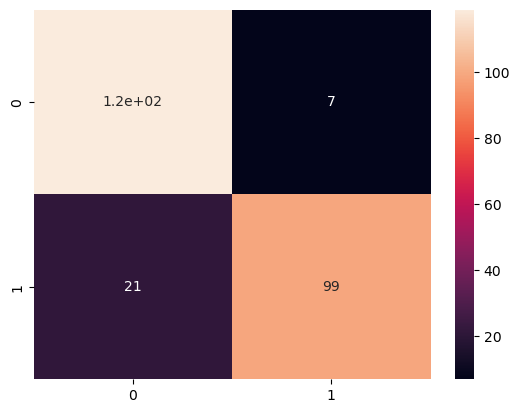

In [224]:
sns.heatmap(cnn,annot=True)

In [225]:
from sklearn import svm

In [227]:
clf=svm.SVC()
clf.fit(x_train,y_train)

SVC()

In [228]:
y_train_pred=clf.predict(x_train)

In [229]:
accuracy_score_train=accuracy_score(y_train,y_train_pred)
accuracy_score_train

0.7913279132791328

In [230]:
y_test_pred=clf.predict(x_test)

In [232]:
accuracy_score_test=accuracy_score(y_test,y_test_pred)
accuracy_score_test

0.8089430894308943

In [233]:
cnn=confusion_matrix(y_test,y_test_pred)
cnn

array([[119,   7],
       [ 40,  80]], dtype=int64)

In [235]:
print(119+80)
print(40+7)
print(199+47)

199
47
246


In [236]:
199/246

0.8089430894308943

checking cross val score

In [237]:
cv2=cross_val_score(clf,x,y,cv=100)

In [265]:
cv_3=np.mean(cv2)
cv_3

0.8141111111111111

<Axes: >

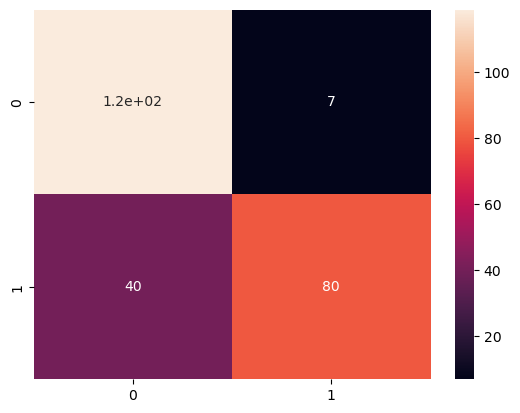

In [239]:
sns.heatmap(cnn,annot=True)

In [281]:
train_score={"logistic_regression":accuracy_score_train ,"Naive Bayes":train_accuracy_score ,"SVM":cv_1}
test_score={"logistic_regression":accuracy_score_test ,"Naive Bayes":test_accuracy_score ,"SVM":cv_2}

In [285]:
print("Train score:",train_score)
print("Test score: ", test_score)
 

Train score: {'logistic_regression': 0.7913279132791328, 'Naive Bayes': 0.9254742547425474, 'SVM': 0.93125}
Test score:  {'logistic_regression': 0.8089430894308943, 'Naive Bayes': 0.8861788617886179, 'SVM': 0.9007777777777777}


from above we conclude that SVM(Support vetor machine) give more accuracy on test data so we can say that we use SVM for credit card fraud Detection 